In [89]:
# 4. retail 데이터는 호주 여러 주에서 기록된 다양한 물품의 소매 판매량을 담고 있으며 엑셀(MS-Excel) 파일 형태로 되어 있다. 
# (a) 다음과 같은 코드를 사용하여 R에서 데이터를 읽어보자

retaildata <- readxl::read_excel("retail.xlsx")
head(retaildata)

X__1,Turnover ; New South Wales ; Supermarket and grocery stores ;,Turnover ; New South Wales ; Liquor retailing ;,Turnover ; New South Wales ; Other specialised food retailing ;,Turnover ; New South Wales ; Food retailing ;,"Turnover ; New South Wales ; Furniture, floor coverings, houseware and textile goods retailing ;",Turnover ; New South Wales ; Electrical and electronic goods retailing ;,"Turnover ; New South Wales ; Hardware, building and garden supplies retailing ;",Turnover ; New South Wales ; Household goods retailing ;,Turnover ; New South Wales ; Clothing retailing ;,...,Turnover ; Total (State) ; Department stores ;,Turnover ; Total (State) ; Newspaper and book retailing ;,Turnover ; Total (State) ; Other recreational goods retailing ;,"Turnover ; Total (State) ; Pharmaceutical, cosmetic and toiletry goods retailing ;",Turnover ; Total (State) ; Other retailing n.e.c. ;,Turnover ; Total (State) ; Other retailing ;,"Turnover ; Total (State) ; Cafes, restaurants and catering services ;",Turnover ; Total (State) ; Takeaway food services ;,"Turnover ; Total (State) ; Cafes, restaurants and takeaway food services ;",Turnover ; Total (State) ; Total (Industry) ;
Series ID,A3349335T,A3349627V,A3349338X,A3349398A,A3349468W,A3349336V,A3349337W,A3349397X,A3349399C,...,A3349333L,A3349860R,A3349464L,A3349389X,A3349461F,A3349788J,A3349547V,A3349388W,A3349870V,A3349396W
30042.0,303.1,41.7,63.9,408.7,65.8,91.8,53.6,211.3,94.0,...,460.1,135.1,64.9,125.6,153.5,479.1,146.3,196.1,342.4,3396.4
30072.0,297.8,43.1,64.0,404.9,65.8,102.6,55.4,223.8,105.7,...,502.6,134.9,67.7,128.7,154.8,486.1,145.5,196.6,342.1,3497.9
30103.0,298.0,40.3,62.7,401.0,62.3,105.0,48.4,215.7,95.1,...,443.8,128.2,65.5,125.0,148.8,467.5,140.2,188.5,328.7,3357.8
30133.0,307.9,40.9,65.6,414.4,68.2,106.0,52.1,226.3,95.3,...,459.1,129.9,68.5,136.6,156.1,491.1,146.5,192.0,338.5,3486.8
30164.0,299.2,42.1,62.6,403.8,66.0,96.9,54.2,217.1,82.8,...,438.4,133.0,65.2,134.7,152.8,485.7,138.8,192.7,331.5,3355.9


In [90]:
# 두 번째 입력값(skip=1)은 엑셀의 시트에 두 개의 머리글(header) 행이 있기 때문에 필요하다. 
retaildata <- readxl::read_excel("retail.xlsx", skip=1)
head(retaildata)

Series ID,A3349335T,A3349627V,A3349338X,A3349398A,A3349468W,A3349336V,A3349337W,A3349397X,A3349399C,...,A3349333L,A3349860R,A3349464L,A3349389X,A3349461F,A3349788J,A3349547V,A3349388W,A3349870V,A3349396W
1982-04-01,303.1,41.7,63.9,408.7,65.8,91.8,53.6,211.3,94.0,...,460.1,135.1,64.9,125.6,153.5,479.1,146.3,196.1,342.4,3396.4
1982-05-01,297.8,43.1,64.0,404.9,65.8,102.6,55.4,223.8,105.7,...,502.6,134.9,67.7,128.7,154.8,486.1,145.5,196.6,342.1,3497.9
1982-06-01,298.0,40.3,62.7,401.0,62.3,105.0,48.4,215.7,95.1,...,443.8,128.2,65.5,125.0,148.8,467.5,140.2,188.5,328.7,3357.8
1982-07-01,307.9,40.9,65.6,414.4,68.2,106.0,52.1,226.3,95.3,...,459.1,129.9,68.5,136.6,156.1,491.1,146.5,192.0,338.5,3486.8
1982-08-01,299.2,42.1,62.6,403.8,66.0,96.9,54.2,217.1,82.8,...,438.4,133.0,65.2,134.7,152.8,485.7,138.8,192.7,331.5,3355.9
1982-09-01,305.4,42.0,64.4,411.8,62.3,97.5,53.6,213.4,89.4,...,465.1,135.5,66.8,130.4,157.2,489.9,144.3,197.6,341.9,3454.3


In [91]:
# (b) 시계열 중에서 하나를 아래와 같이 선택하여 보자. 
myts <- ts(retaildata[,"A3349873A"], frequency=12, start=c(1982,4))
head(myts)
str(myts)

      Apr  May  Jun  Jul  Aug  Sep
1982 62.4 63.1 59.6 61.9 60.7 61.2

 Time-Series [1:381, 1] from 1982 to 2014: 62.4 63.1 59.6 61.9 60.7 61.2 62.1 68.3 104 63.9 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "A3349873A"


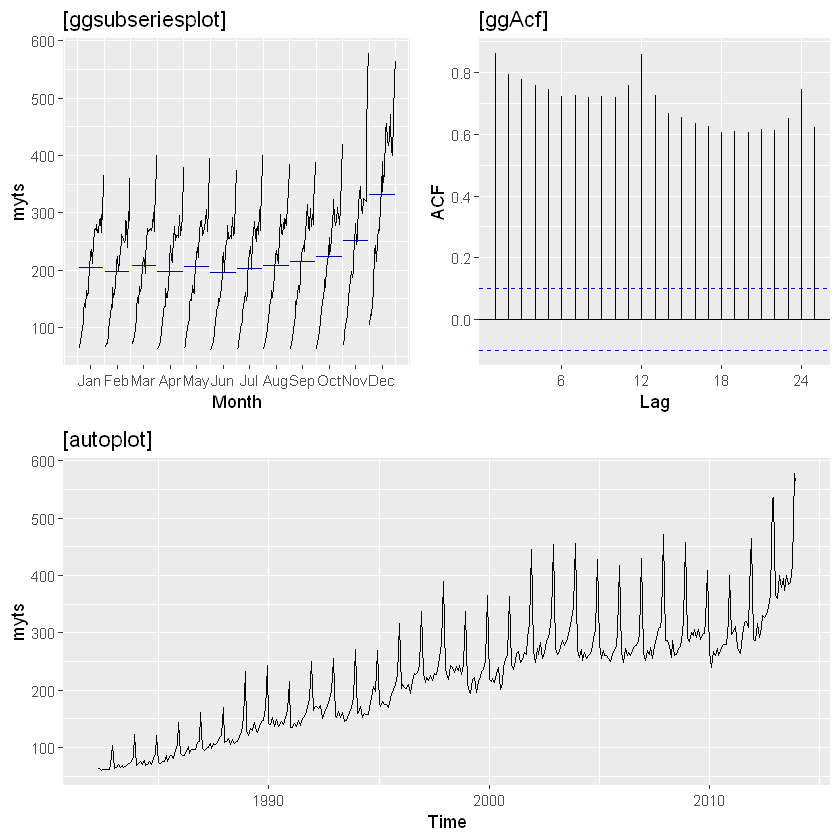

In [92]:
library(forecast)
library(gridExtra)
library(ggplot2)


p1 <- autoplot(myts) + labs(title = '[autoplot]') 
p2 <- ggsubseriesplot(myts) + labs(title = '[ggsubseriesplot]') 
p3 <- ggAcf(myts) + labs(title = '[ggAcf]') 

grid.arrange(p2, p3, p1,
    layout_matrix = rbind(
        c(1, 2),
        c(3, 3)))

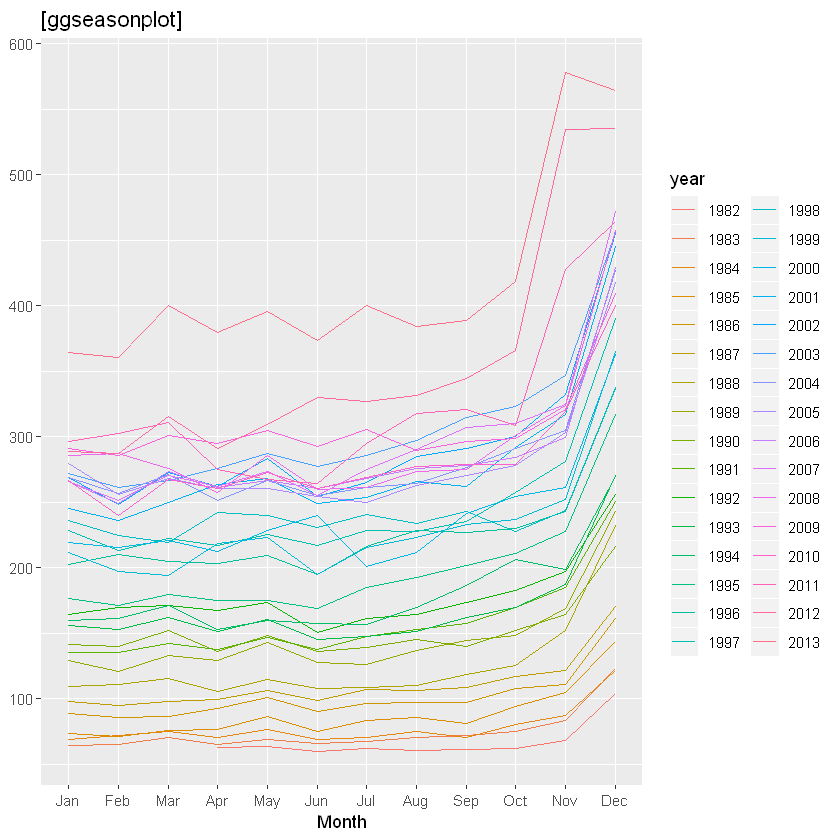

In [99]:
ggseasonplot(myts) + labs(title = '[ggseasonplot]') 

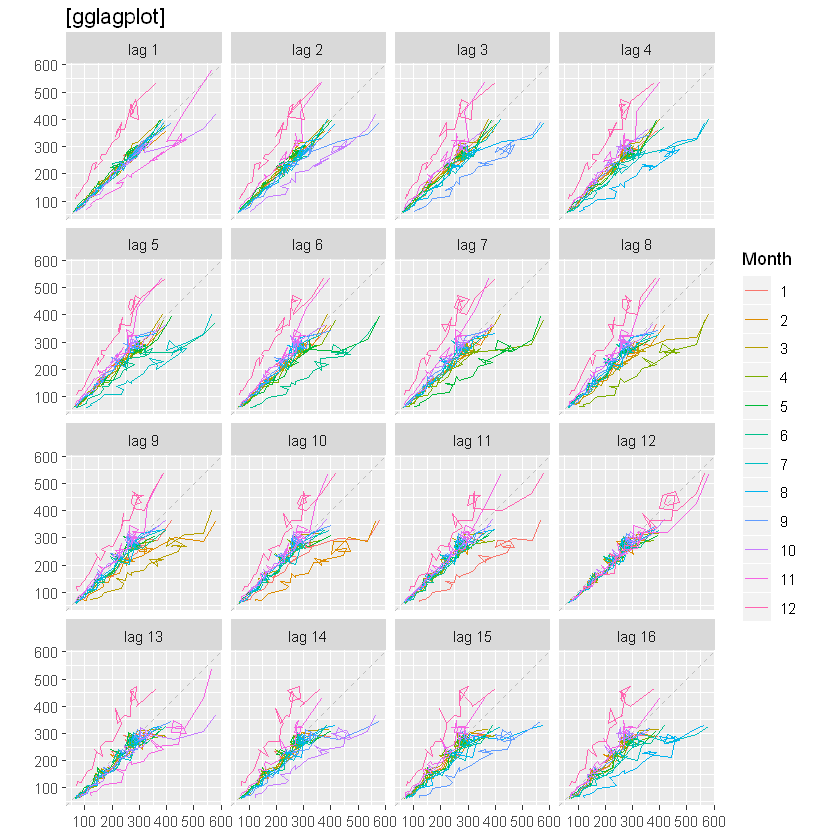

In [100]:
gglagplot(myts) + labs(title = '[gglagplot]') 

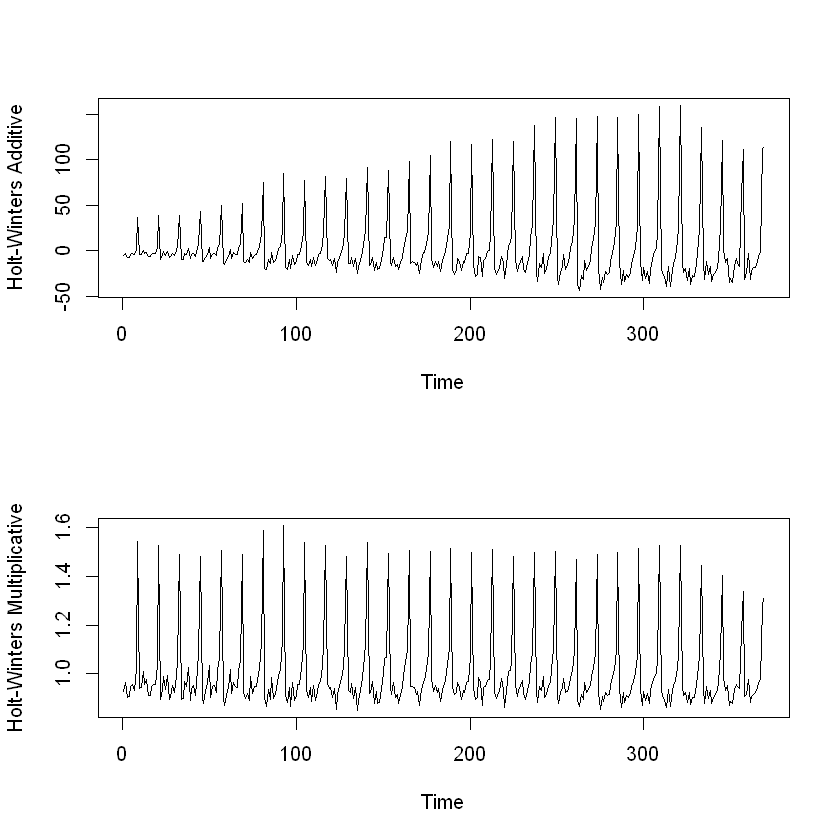

In [94]:
#(c) 홀트-윈터스(Holt-Winters) 곱셈 기법을 데이터에 적용해보라. 이 시계열에서 왜 곱셈 계절성이 필요한가?

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

myts_add <- as.data.frame(HoltWinters(myts, seasonal = "additive")$fitted)
ts.plot(myts_add$season, ylab = "Holt-Winters Additive")

myts_multi <- as.data.frame(HoltWinters(myts, seasonal = "multiplicative")$fitted)
ts.plot(myts_multi$season, ylab = "Holt-Winters Multiplicative")

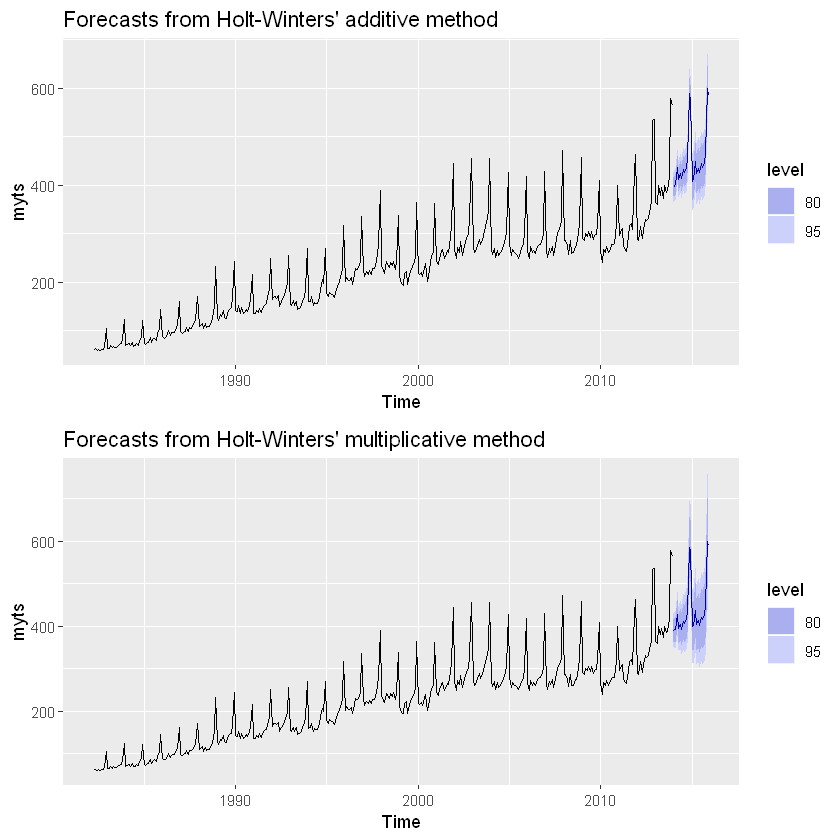

In [95]:
# https://otexts.com/fppkr/holt-winters.html
myts_add <- hw(myts, seasonal="additive")
myts_multi <- hw(myts, seasonal="multiplicative")

p1 <- autoplot(myts_add)
p2 <- autoplot(myts_multi)

grid.arrange(p1, p2, nrow=2)

ETS(M,Ad,M) 

Call:
 ets(y = myts) 

  Smoothing parameters:
    alpha = 0.5449 
    beta  = 0.0101 
    gamma = 0.273 
    phi   = 0.98 

  Initial states:
    l = 63.1031 
    b = 0.3194 
    s = 0.9511 0.9049 0.9219 1.5382 1.0807 0.9941
           0.9575 0.9387 0.9314 0.8936 0.9659 0.9219

  sigma:  0.0506

     AIC     AICc      BIC 
4027.141 4029.030 4098.111 

Training set error measures:
                    ME    RMSE      MAE       MPE     MAPE     MASE        ACF1
Training set 0.8553146 13.9672 8.722404 0.3510144 3.697244 0.460664 -0.06028984


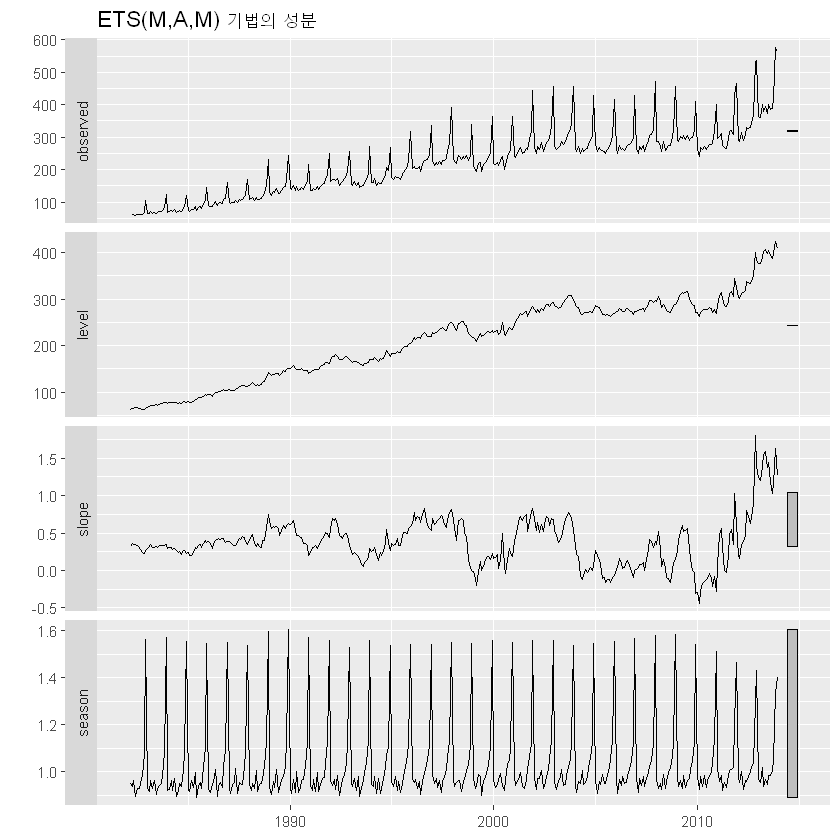

In [96]:
# (d) 가장 좋다고 판단되는 모형에서 얻은 잔차가 백색잡음처럼 보이는지 확인해보라. 
# https://otexts.com/fppkr/expsmooth-estimation-and-model-selection.html

fit <- ets(myts)
summary(fit)

autoplot(fit) + ggtitle("ETS(M,A,M) 기법의 성분")

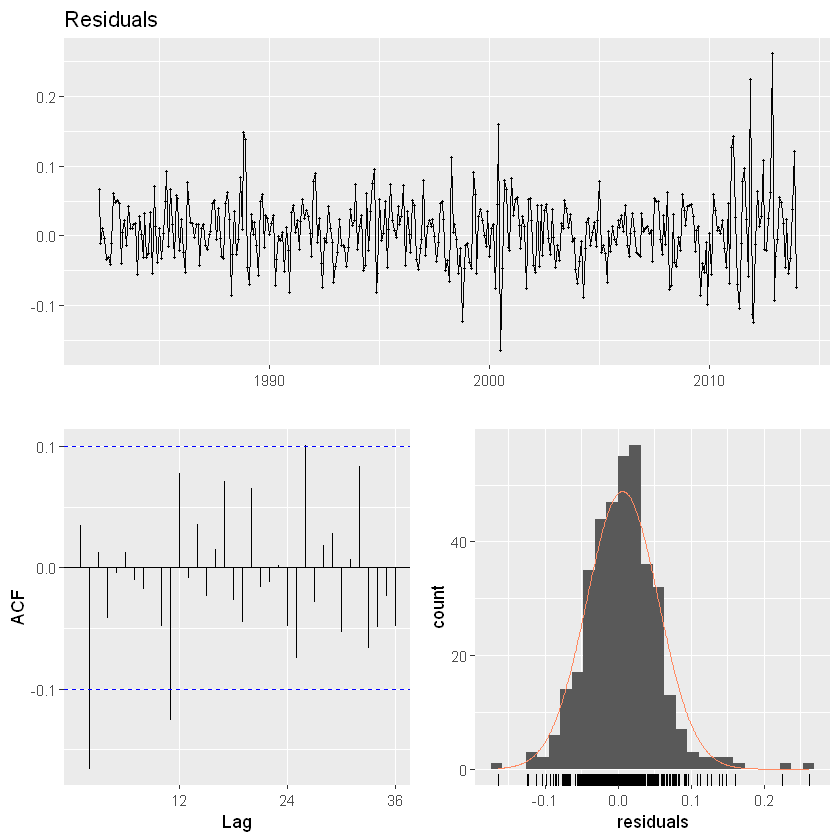

In [98]:
# https://otexts.com/fppkr/residuals.html

checkresiduals(residuals(fit))